In [27]:
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


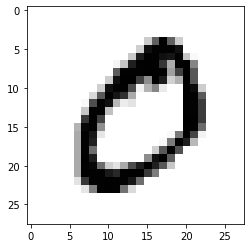

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


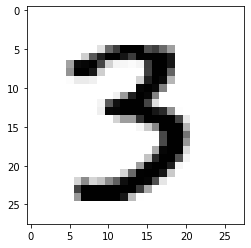

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
#index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [7]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [10]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1818 - accuracy: 0.9458
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0608 - accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0437 - accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0343 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0161 - accuracy: 0.9946
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 - 1s - loss: 0.0366 - accuracy: 0.9905
test_loss: 0.03662851080298424 
test_accuracy: 0.9904999732971191
model.predict() 결과 :  [1.4672110e-14 2.4992768e-11 9.5147765e-09 9.9893896e-07 1.2260498e-11
 8.7029952e-14 3.1294317e-18 9.9999905e-01 6.2533013e-12 7.7376416e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


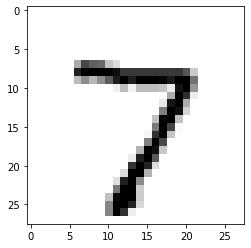

In [13]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [3.9952155e-07 2.5814588e-05 9.8243653e-12 7.2158873e-01 4.0788832e-06
 2.7809736e-01 4.4529614e-05 1.0448518e-10 3.3179433e-06 2.3572121e-04]
라벨: 5, 예측결과: 3


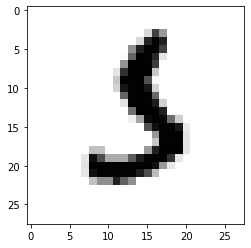

예측확률분포: [6.0870676e-08 3.0559981e-08 1.1116402e-10 1.2415840e-07 8.4401649e-01
 1.2841265e-03 5.7784974e-04 7.0940436e-09 1.8052422e-05 1.5410326e-01]
라벨: 9, 예측결과: 4


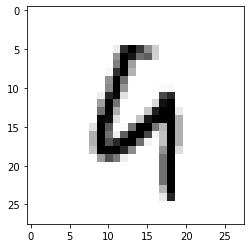

예측확률분포: [8.6215505e-06 9.7919011e-04 4.9203464e-07 2.0322464e-05 2.2927241e-02
 1.6002961e-06 5.0155094e-08 9.0789670e-01 3.1033973e-04 6.7855544e-02]
라벨: 9, 예측결과: 7


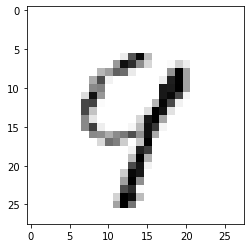

예측확률분포: [2.3473007e-13 3.0089109e-07 4.4014254e-01 1.2579066e-05 8.4984580e-10
 7.6798442e-13 1.5000904e-17 5.5984455e-01 1.1969156e-11 2.1629443e-11]
라벨: 2, 예측결과: 7


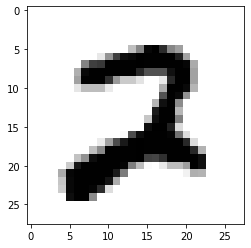

예측확률분포: [6.8921363e-10 3.5867917e-12 2.0448544e-08 1.7431404e-06 9.6074181e-08
 7.8673416e-05 7.1681974e-16 3.5021947e-06 2.5561258e-01 7.4430341e-01]
라벨: 8, 예측결과: 9


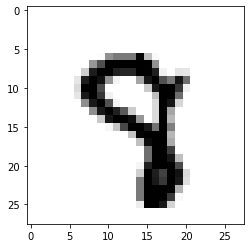

In [14]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [15]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [16]:
#가위바위보 분류기

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, glob
print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [18]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	


In [19]:
#데이터셋에 png 파일이 다수이므로 이걸 jpg로 변환 
#왜 안되는지 이해가 안가서 수작업으로 png -> jpg 변환해서 업로드 
def conv_images(img_path):
    images=glob.glob(img_path + "/*.png")
    print(len(images), "images will convert to jpg")
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.convert("RGB")
        new_img.save("img.JPEG")
    print("Convert Complete")
#가위 변환
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
conv_images(image_dir_path)
print("가위 변환 완료")
#바위변환 
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
conv_images(image_dir_path)
print("바위 변환 완료")
#보자기변환
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
conv_images(image_dir_path)
print("보자기 변환 완료")

0 images will convert to jpg
Convert Complete
가위 변환 완료
0 images will convert to jpg
Convert Complete
바위 변환 완료
0 images will convert to jpg
Convert Complete
보자기 변환 완료


In [20]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!\n")
#바위 
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 resize 완료\n")
#보자기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보자기 resize 완료\n")


1590  images to be resized.
1590  images resized.
가위 이미지 resize 완료!

1566  images to be resized.
1566  images resized.
바위 resize 완료

1552  images to be resized.
1552  images resized.
보자기 resize 완료



In [21]:
import numpy as np

def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path,4708)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4708 입니다.
x_train shape: (4708, 28, 28, 3)
y_train shape: (4708,)


라벨:  0


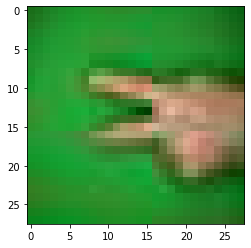

In [22]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [24]:
#학습 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
148/148 [==============================] - 1s 3ms/step - loss: 4.2559 - accuracy: 0.6642
Epoch 2/10
148/148 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9316
Epoch 3/10
148/148 [==============================] - 0s 3ms/step - loss: 0.1032 - accuracy: 0.9656
Epoch 4/10
148/148 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.9802
Epoch 5/10
148/148 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9892
Epoch 6/10
148/148 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9943
Epoch 7/10
148/148 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9909
Epoch 8/10
148/148 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 9/10
148/148 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 10/10
148/148 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9881

In [76]:
#test 

image_dir_path_test = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path_test,23)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


학습데이터(x_train)의 이미지 개수는 23 입니다.
x_test shape: (23, 28, 28, 3)
y_test shape: (23,)


In [77]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

1/1 - 0s - loss: 0.0019 - accuracy: 1.0000
test_loss: 0.0018859076080843806 
test_accuracy: 1.0
